In [1]:
import pandas
df=pandas.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


In [2]:
df.shape

(8425, 23)

In [3]:
# We see there are some columns with null values. 
# Before we start pre-processing, let's find out which of the columns have maximum null values
df.count().sort_values()

Sunshine         4431
Evaporation      4913
Cloud3pm         5970
Cloud9am         6004
Pressure3pm      7113
Pressure9am      7116
WindGustDir      7434
WindGustSpeed    7434
WindDir9am       7596
WindDir3pm       8117
Rainfall         8185
RainToday        8185
RainTomorrow     8186
WindSpeed3pm     8318
Humidity3pm      8323
Temp3pm          8329
WindSpeed9am     8349
MinTemp          8350
MaxTemp          8365
Humidity9am      8366
Temp9am          8369
Location         8425
Date             8425
dtype: int64

In [4]:
df.isnull().sum()  #checking missing values 

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Information we get from the data--
8425 rows,
23 columns,
7 columns we have object..
16 columns we have float..

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


number of unique vaues in cardinality could be--
if there are more unique values then it is hard to do label encoding,,
also effect on the efficiency of the model


In [7]:
for i  in df:
  count = len(df[i].unique())
  print("The Cardinality of each column {} : {} ".format(i,count))

The Cardinality of each column Date : 3004 
The Cardinality of each column Location : 12 
The Cardinality of each column MinTemp : 286 
The Cardinality of each column MaxTemp : 332 
The Cardinality of each column Rainfall : 251 
The Cardinality of each column Evaporation : 117 
The Cardinality of each column Sunshine : 141 
The Cardinality of each column WindGustDir : 17 
The Cardinality of each column WindGustSpeed : 53 
The Cardinality of each column WindDir9am : 17 
The Cardinality of each column WindDir3pm : 17 
The Cardinality of each column WindSpeed9am : 35 
The Cardinality of each column WindSpeed3pm : 36 
The Cardinality of each column Humidity9am : 91 
The Cardinality of each column Humidity3pm : 95 
The Cardinality of each column Pressure9am : 385 
The Cardinality of each column Pressure3pm : 375 
The Cardinality of each column Cloud9am : 10 
The Cardinality of each column Cloud3pm : 10 
The Cardinality of each column Temp9am : 305 
The Cardinality of each column Temp3pm : 3

In [8]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [9]:
import numpy as np   # for numerical computation with n dimensional arrays 
import pandas as pd # for data manipluation 
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for conditional plotting 

import warnings
warnings.filterwarnings('ignore')

In [10]:
#Handling Cardinatlity issue
df["Date"] = pd.to_datetime(df["Date"])   #Converting into Date
df["Year"] = df["Date"].dt.year           #abstracting year in different column 
df["Month"] = df["Date"].dt.month         #abstracting month in diffrent column  
df["Day"] = df["Date"].dt.day             #abstracting day in diffrent column  

In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


#Since Evaporation, Sunshine, Cloud9am, Cloud3pm contain null values more than 30%, it will not help to improve out modes so they will be dropped.
#Date information does not needed, so this will be also dropped.

In [12]:
df['RainToday'].value_counts()
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df['RainToday'].nunique()

2

In [14]:
df['RainTomorrow'].value_counts()
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
df['RainTomorrow'].nunique()

2

In [16]:
# Raintoday
df['RainToday'] = df['RainToday'].fillna('No')
# Raintomorrow
df['RainTomorrow'] = df['RainTomorrow'].fillna('No')

In [17]:
df['RainTomorrow'].unique()
df['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

In [18]:
df['RainToday'].unique()
df['RainToday'].value_counts()

No     6435
Yes    1990
Name: RainToday, dtype: int64

In [19]:
#Both "RainToday" and "RainTomorrow" are object (Yes/No). We will convert them into binary (1/0) for our convenience.
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [20]:
df['RainToday'].unique()
df['RainToday'].value_counts()

0    6435
1    1990
Name: RainToday, dtype: int64

In [21]:
df['RainTomorrow'].unique()
df['RainTomorrow'].value_counts()

0    6434
1    1991
Name: RainTomorrow, dtype: int64

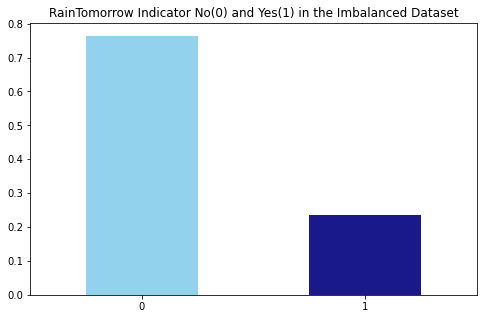

In [22]:
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()
#View the Frequency Distribution-----DATA IS NOT EVENLY DISTRIBUTED

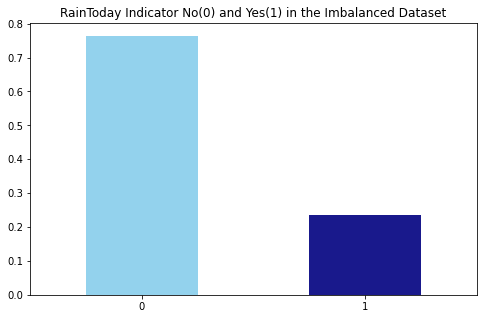

In [23]:
fig = plt.figure(figsize = (8,5))
df.RainToday.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainToday Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

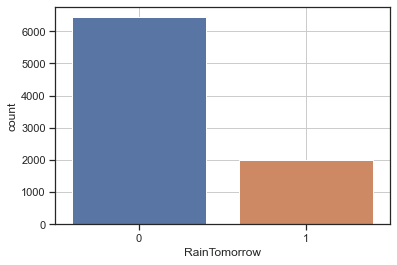

In [24]:
sns.set(style="ticks")
sns.countplot(df['RainTomorrow'])
plt.grid()

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

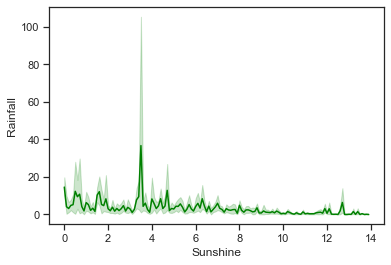

In [25]:
sns.lineplot(data=df,x="Sunshine",y="Rainfall",color = "green")# we can see sunshine is inversely proportional to the Rainfall

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

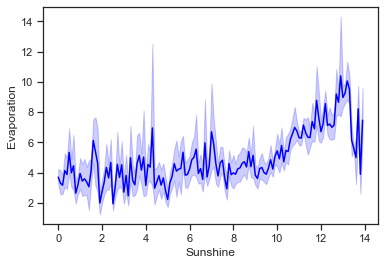

In [26]:
sns.lineplot(data=df,x="Sunshine",y="Evaporation",color = "blue")# we can see sunshine is directly proportional to the evoporation

In [27]:
df = df.drop(['Date','Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)

<AxesSubplot:>

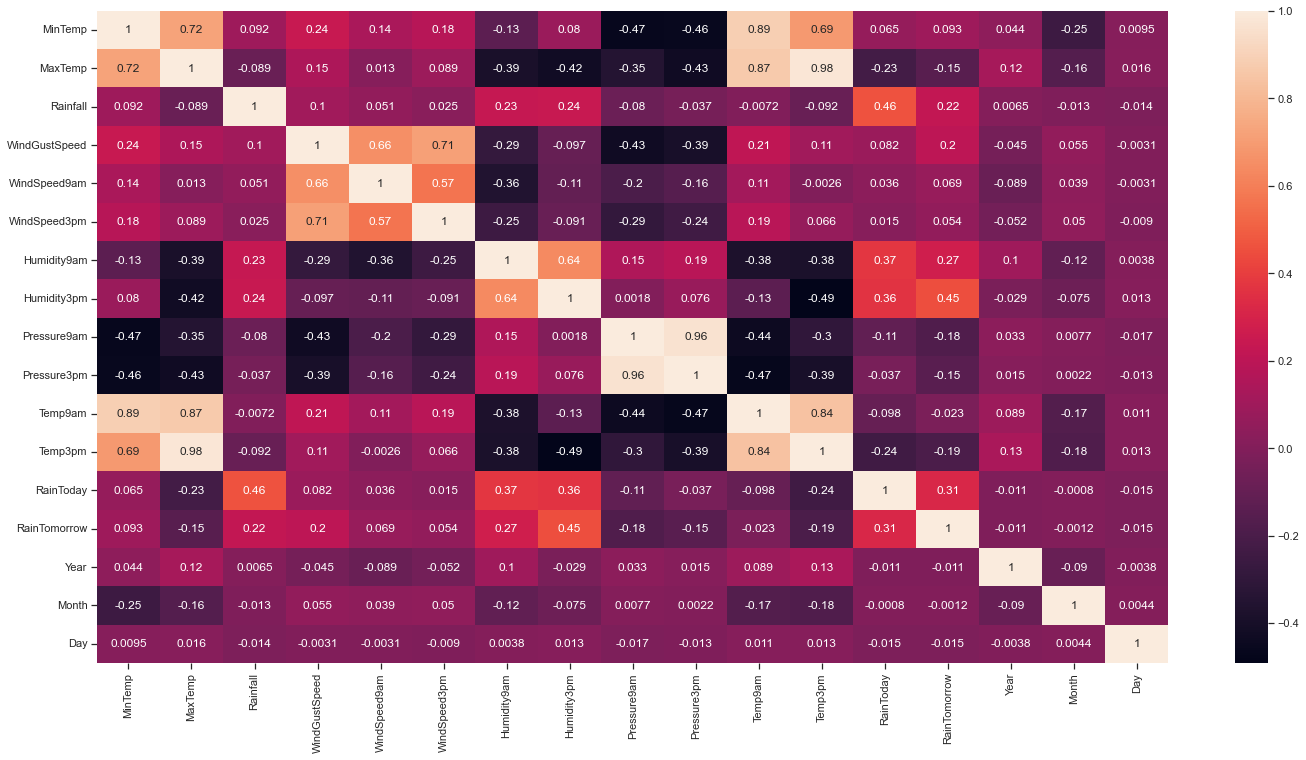

In [28]:
plt.figure(figsize =(24,12))
sns.heatmap(df.corr(), annot = True)

In [29]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

<AxesSubplot:xlabel='Location', ylabel='Rainfall'>

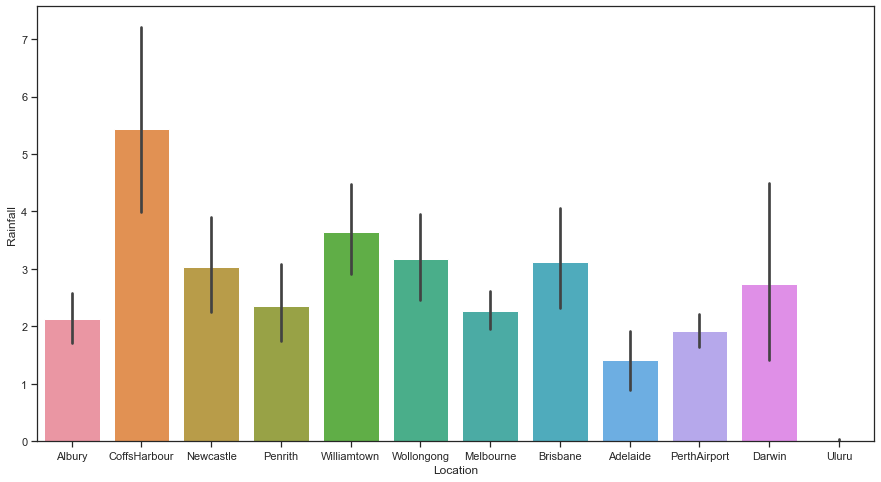

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(x='Location',y='Rainfall',data=df)

<AxesSubplot:xlabel='Location', ylabel='Rainfall'>

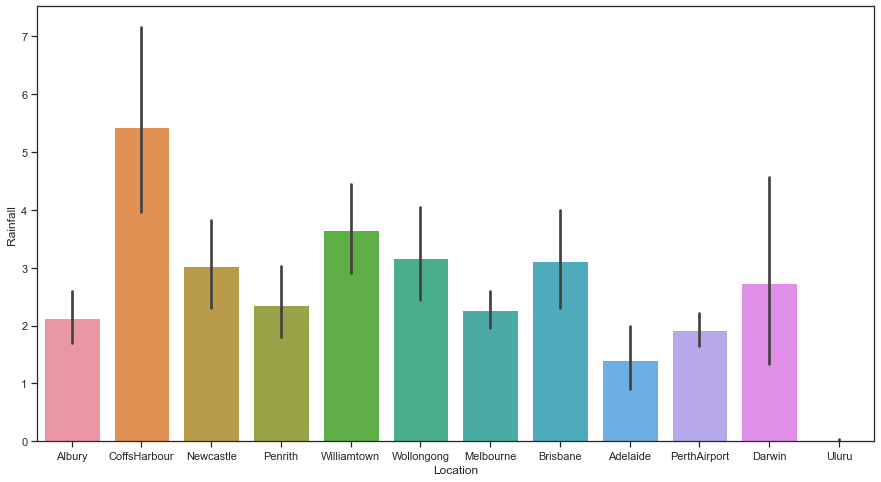

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(x='Location',y='Rainfall',data=df)

ValueError: Buffer has wrong number of dimensions (expected 1, got 3)

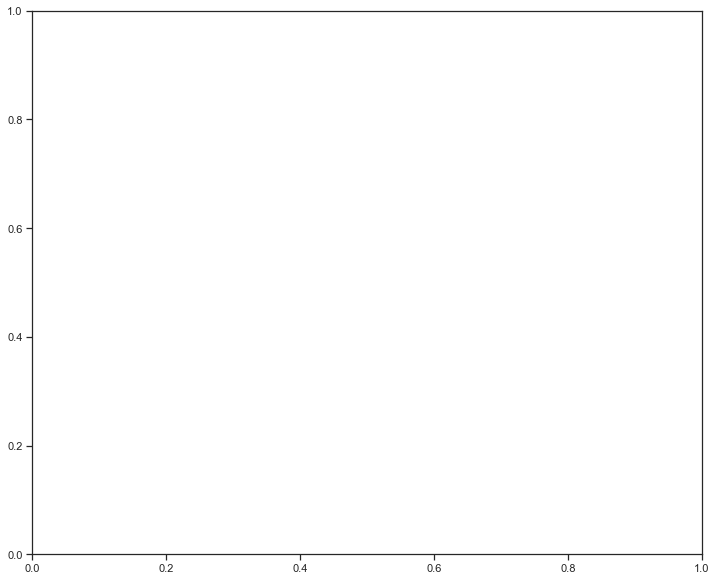

In [32]:
# we can not directly impute missing values by using mean becuase there could be a chance of outliers in the data 
# lets check by box plot 
plt.figure(figsize=(12,10))
df.boxplot(df,rot = 90)

In [34]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Day'],
      dtype='object')

In [35]:
categorical=[column for column in df.columns if df[column].dtype=='object']
categorical=df[categorical]

In [36]:
categorical.head(10).T

,0,1,2,3,4,5,6,7,8,9
Location,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury
WindGustDir,W,WNW,WSW,NE,W,WNW,W,W,NNW,W
WindDir9am,W,NNW,W,SE,ENE,W,SW,SSE,SE,S
WindDir3pm,WNW,WSW,WSW,E,NW,W,W,W,NW,SSE


In [37]:
categorical.isnull().sum()

Location         0
WindGustDir    991
WindDir9am     829
WindDir3pm     308
dtype: int64

In [38]:
for features in categorical:
    df[features] = df[features].fillna(df[features].mode()[0])   # all missing values imputed by mode 

In [39]:
categorical.isnull().sum()

Location         0
WindGustDir    991
WindDir9am     829
WindDir3pm     308
dtype: int64

In [40]:
continuous =[column for column in df.columns if df[column].dtype!='object']
continuous=df[continuous]

In [41]:
# Remove Outliers from Numerical Features 

features_with_outliers = continuous
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit, feature] = lower_limit
    df.loc[df[feature]>upper_limit, feature] = upper_limit

ValueError: Index data must be 1-dimensional

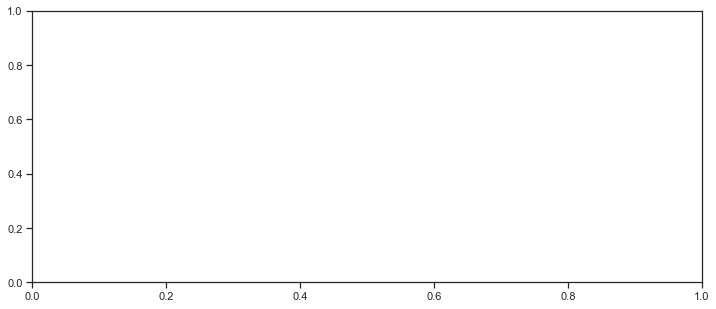

In [42]:
plt.figure(figsize=(12,5))
df.boxplot(features_with_outliers,rot = 90) 

In [43]:
continuous.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,1
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12,2
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12,3
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12,4
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12,5


In [44]:
continuous.isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Temp9am            56
Temp3pm            96
RainToday           0
RainTomorrow        0
Year                0
Month               0
Day                 0
dtype: int64

In [45]:
for features in continuous:
    df[features] = df[features].fillna(df[features].mean())   # all missing values imputed by mean 

In [46]:
df['RainTomorrow'].unique()
df['RainTomorrow'].value_counts()

0    8425
Name: RainTomorrow, dtype: int64

In [47]:
# Now,lets check missing values again
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [48]:
df.shape

(8425, 21)

In [49]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [50]:
pd.get_dummies(df['WindGustDir'])

,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8421,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8422,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8423,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [51]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

label_encoder_columns = ['RainToday', 'RainTomorrow']

for column in label_encoder_columns:
    df[column] = encoder.fit_transform(df[column])

In [52]:
df['RainTomorrow'].unique()
df['RainTomorrow'].value_counts()

0    8425
Name: RainTomorrow, dtype: int64

In [53]:
def onehot_encoder(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df= pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [54]:
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

df = onehot_encoder(df, categorical_features)

In [55]:
df

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.90000,0.6,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.10000,0.0,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.70000,0.0,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.00000,0.0,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.30000,1.0,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.40000,0.0,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,...,0,0,0,0,0,0,0,0,0,0
8421,3.6,25.30000,0.0,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,...,0,0,0,0,0,0,0,0,0,0
8422,5.4,26.90000,0.0,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,...,0,0,0,0,0,0,0,0,1,0
8423,7.8,27.00000,0.0,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
                ..
SSW              0
SW               0
W                0
WNW              0
WSW              0
Length: 77, dtype: int64

In [57]:
# first five rows of dataframe
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,1,0,0,0,0,0,0,0,0


In [58]:
# Now,lets check missing values again
df.isnull().sum().sum()

0

            1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

In [59]:
y = df["RainTomorrow"]  # dependent or target 
x = df.drop(["RainTomorrow"],axis = 1)  # indepedent or input 

In [60]:
print(x.shape,y.shape)

(8425, 76) (8425,)


In [61]:
import six
import joblib
import sys
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.modules.joblib']=joblib

In [62]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

print(x.shape,y.shape)

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)
x=pd.DataFrame(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='liblinear', random_state=9)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred)
print('Logistic Regression:', lr_ac * 100)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, x_test,y_pred)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=6)
dtc.fit(x_train, y_train)

y_pred =dtc.predict(x_test)
dtc_acc = accuracy_score(y_test, y_pred)
print('Decision Tree:',dtc_acc * 100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
rfc= RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0,max_samples=0.9)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
rfc_acc = accuracy_score(y_test, y_pred)
print('Random Forest:',rfc_acc * 100)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test, y_pred)
print('Knn:',knn_acc * 100)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel = 'rbf', random_state = 42)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
svc_ac = accuracy_score(y_test, y_pred)
print('SVM:', svc_ac * 100)

In [ ]:
print('Logistic Regression:', lr_ac * 100)
print('Decision Tree:',dtc_acc * 100)
print('Random Forest:',rfc_acc * 100)
print('Knn:',knn_acc * 100)
print('SVM:', svc_ac * 100)

In [ ]:
import pickle
pickle.dump(rfc, open('iri.pkl', 'wb'))
loaded_model = pickle.load(open("iri.pkl", 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
y = df["Rainfall"]  # dependent or target 
x = df.drop(["Rainfall"],axis = 1)  # indepedent or input 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
dtr = DecisionTreeRegressor(random_state=1)

In [ ]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
y_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

In [ ]:
# Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
y_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

In [ ]:
lr = LinearRegression()
enet = ElasticNet(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
ada = AdaBoostRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42)
cat = CatBoostRegressor(silent=True, random_state=42)

models = [lr, enet, dt, rf, ada, gbr, xgb, lgbm, cat]

In [ ]:
for model in models:
    name = model.__class__.__name__
    scores = cross_val_score(model, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    mse = (-1) * np.mean(scores) # negative mean squared error로 설정했으므로 -1을 곱해 부호를 맞춰줍니다.
    print('Model %s - RMSE: %.4f' % (name, np.sqrt(mse)))

In [ ]:
# Gradient Boosting
gbr_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 80, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 5],
    'random_state': [42]
}

gbr_search = GridSearchCV(gbr, param_grid=gbr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gbr_search.fit(X_train, y_train)
best_mse = (-1) * gbr_search.best_score_
best_rmse = np.sqrt(best_mse)

print('Best score: {}, Best params: {}'.format(round(best_rmse, 4), gbr_search.best_params_))

In [ ]:
# Random Forest
rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 5],
    'random_state': [42]
}

rf_search = GridSearchCV(gbr, param_grid=rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_search.fit(X_train, y_train)
best_mse = (-1) * rf_search.best_score_
best_rmse = np.sqrt(best_mse)

print('Best score: {}, Best params: {}'.format(round(best_rmse, 4), rf_search.best_params_))

In [ ]:
# LGBM
lgbm_params = {
    'num_leaves': [25, 31, 35],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [3, 7, 11],
    'random_state': [42]
}

lgbm_search = GridSearchCV(lgbm, param_grid=lgbm_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lgbm_search.fit(X_train, y_train)
best_mse = (-1) * lgbm_search.best_score_
best_rmse = np.sqrt(best_mse)

print('Best score: {}, Best params: {}'.format(round(best_rmse, 4), lgbm_search.best_params_))

In [ ]:
# CayBoost
# CatBoost는 categorical feature를 parameter로 넣을 수 있습니다.
cat_features = ['sex', 'smoker', 'region_1', 'region_2', 'region_3']

cat_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [3, 7, 11],
    'cat_features': [cat_features], 
    'silent': [True],
    'random_state': [42]
}

cat_search = GridSearchCV(cat, param_grid=cat_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
cat_search.fit(X_train, y_train)
best_mse = (-1) * cat_search.best_score_
best_rmse = np.sqrt(best_mse)

print('Best score: {}, Best params: {}'.format(round(best_rmse, 4), cat_search.best_params_))

In [ ]:
gbr_final = GradientBoostingRegressor(**gbr_search.best_params_)

gbr_final.fit(X_train, y_train)
y_pred_gbr = gbr_final.predict(X_test)

name = gbr_final.__class__.__name__

# Test RMSE
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print('RMSE of %s: %.4f' % (name, np.sqrt(mse_gbr)))

In [ ]:
rf_final = RandomForestRegressor(**rf_search.best_params_)

rf_final.fit(X_train, y_train)
y_pred_rf = rf_final.predict(X_test)

name = rf_final.__class__.__name__

# Test RMSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('RMSE of %s: %.4f' % (name, np.sqrt(mse_rf)))

In [ ]:
lgbm_final = LGBMRegressor(**lgbm_search.best_params_)

lgbm_final.fit(X_train, y_train)
y_pred_lgbm = lgbm_final.predict(X_test)

name = lgbm_final.__class__.__name__

# Test RMSE
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
print('RMSE of %s: %.4f' % (name, np.sqrt(mse_lgbm)))

In [ ]:
cat_final = CatBoostRegressor(**cat_search.best_params_)

cat_final.fit(X_train, y_train)
y_pred_cat = cat_final.predict(X_test)

name = cat_final.__class__.__name__

# Test RMSE
mse_cat = mean_squared_error(y_test, y_pred_cat)
print('RMSE of %s: %.4f' % (name, np.sqrt(mse_cat)))